In [7]:
# import libraries
import pandas as pd
import numpy as np

In [8]:
import plotly.express as px
import plotly.figure_factory as ff

In [9]:
data_covid19 = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"

In [10]:
df_covid = pd.read_csv(data_covid19)

In [11]:
df_covid.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [12]:
# import data for analysis

df_population = pd.read_csv("ACSST1Y2018.S0101_data_with_overlays_2020-05-13T042119.csv")
df_states = pd.read_excel("state-geocodes-v2018.xlsx")
df_counties = pd.read_excel("all-geocodes-v2018.xlsx")
df_hospitals = pd.read_csv("Hospitals.csv")

In [13]:
df_population.head()

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C02_001E,S0101_C02_001M,S0101_C03_001E,S0101_C03_001M,S0101_C04_001E,S0101_C04_001M,...,S0101_C02_038E,S0101_C02_038M,S0101_C03_038E,S0101_C03_038M,S0101_C04_038E,S0101_C04_038M,S0101_C05_038E,S0101_C05_038M,S0101_C06_038E,S0101_C06_038M
0,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total MOE!!Total population,Estimate!!Percent!!Total population,Margin of Error!!Percent MOE!!Total population,Estimate!!Male!!Total population,Margin of Error!!Male MOE!!Total population,Estimate!!Percent Male!!Total population,Margin of Error!!Percent Male MOE!!Total popul...,...,Estimate!!Percent!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent MOE!!PERCENT ALLOCATE...,Estimate!!Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Male MOE!!PERCENT ALLOCATED!!Age,Estimate!!Percent Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Male MOE!!PERCENT ALL...,Estimate!!Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Female MOE!!PERCENT ALLOCATED...,Estimate!!Percent Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Female MOE!!PERCENT A...
1,0500000US01117,"Shelby County, Alabama",215707,*****,(X),(X),105022,1416,(X),(X),...,0.7,(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,0500000US01121,"Talladega County, Alabama",79828,*****,(X),(X),38489,450,(X),(X),...,0.4,(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,0500000US01125,"Tuscaloosa County, Alabama",208911,*****,(X),(X),99576,877,(X),(X),...,9.2,(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,0500000US04021,"Pinal County, Arizona",447138,*****,(X),(X),233292,675,(X),(X),...,1.9,(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [14]:
# make the first row (Row 0) the column header names

df_population.columns = df_population.iloc[0]

In [15]:
df_population.head()

,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total MOE!!Total population,Estimate!!Percent!!Total population,Margin of Error!!Percent MOE!!Total population,Estimate!!Male!!Total population,Margin of Error!!Male MOE!!Total population,Estimate!!Percent Male!!Total population,Margin of Error!!Percent Male MOE!!Total population,...,Estimate!!Percent!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent MOE!!PERCENT ALLOCATED!!Age,Estimate!!Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Male MOE!!PERCENT ALLOCATED!!Age,Estimate!!Percent Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Male MOE!!PERCENT ALLOCATED!!Age,Estimate!!Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Female MOE!!PERCENT ALLOCATED!!Age,Estimate!!Percent Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Female MOE!!PERCENT ALLOCATED!!Age
0,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total MOE!!Total population,Estimate!!Percent!!Total population,Margin of Error!!Percent MOE!!Total population,Estimate!!Male!!Total population,Margin of Error!!Male MOE!!Total population,Estimate!!Percent Male!!Total population,Margin of Error!!Percent Male MOE!!Total popul...,...,Estimate!!Percent!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent MOE!!PERCENT ALLOCATE...,Estimate!!Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Male MOE!!PERCENT ALLOCATED!!Age,Estimate!!Percent Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Male MOE!!PERCENT ALL...,Estimate!!Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Female MOE!!PERCENT ALLOCATED...,Estimate!!Percent Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Female MOE!!PERCENT A...
1,0500000US01117,"Shelby County, Alabama",215707,*****,(X),(X),105022,1416,(X),(X),...,0.7,(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,0500000US01121,"Talladega County, Alabama",79828,*****,(X),(X),38489,450,(X),(X),...,0.4,(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,0500000US01125,"Tuscaloosa County, Alabama",208911,*****,(X),(X),99576,877,(X),(X),...,9.2,(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,0500000US04021,"Pinal County, Arizona",447138,*****,(X),(X),233292,675,(X),(X),...,1.9,(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [16]:
# remove the first row 
#(i.e. make the dataframe now all of the data after the first row)

df_population = df_population[1:]

In [17]:
# look at all columns in dataframe
df_population.columns.tolist()

['id',
 'Geographic Area Name',
 'Estimate!!Total!!Total population',
 'Margin of Error!!Total MOE!!Total population',
 'Estimate!!Percent!!Total population',
 'Margin of Error!!Percent MOE!!Total population',
 'Estimate!!Male!!Total population',
 'Margin of Error!!Male MOE!!Total population',
 'Estimate!!Percent Male!!Total population',
 'Margin of Error!!Percent Male MOE!!Total population',
 'Estimate!!Female!!Total population',
 'Margin of Error!!Female MOE!!Total population',
 'Estimate!!Percent Female!!Total population',
 'Margin of Error!!Percent Female MOE!!Total population',
 'Estimate!!Total!!Total population!!AGE!!Under 5 years',
 'Margin of Error!!Total MOE!!Total population!!AGE!!Under 5 years',
 'Estimate!!Percent!!Total population!!AGE!!Under 5 years',
 'Margin of Error!!Percent MOE!!Total population!!AGE!!Under 5 years',
 'Estimate!!Male!!Total population!!AGE!!Under 5 years',
 'Margin of Error!!Male MOE!!Total population!!AGE!!Under 5 years',
 'Estimate!!Percent Male!!T

In [18]:
# make a list of all columns that start with "Margin of Error"

margin_error = df_population.columns.str.startswith("Margin of Error!!")

In [19]:
# keeep only NOT true values for margin of error
df_pop_values = df_population.loc[:, ~margin_error]

In [20]:
# remove columns that have a (X) value 

df_us_pop = df_pop_values.drop(columns=df_pop_values.columns[(df_pop_values == '(X)').any()])

In [21]:
# strip "Estimate!!" from columns because it's on the outside of the name
df_us_pop.columns = df_us_pop.columns.str.strip("Estimate!!")

In [22]:
# remove !!Total population from column headers by replacing with nothing
df_us_pop.columns = df_us_pop.columns.str.replace("!!Total population", "")

In [23]:
# make list of columns we want to keep for analysis

uspop_col = ['d',
             'Geographic Area N',
             'Total',
             'Male',
             'Female',
             'Total!!SELECTED AGE CATEGORIES!!Under 18 year',
             'Male!!SELECTED AGE CATEGORIES!!Under 18 year',
             'Female!!SELECTED AGE CATEGORIES!!Under 18 year',
             'Total!!SELECTED AGE CATEGORIES!!60 years and over',
             'Male!!SELECTED AGE CATEGORIES!!60 years and over',
             'Female!!SELECTED AGE CATEGORIES!!60 years and over',
             'Total!!SUMMARY INDICATORS!!Median age (years)',
             'Total!!SUMMARY INDICATORS!!Sex ratio (males per 100 females)',
             'Total!!SUMMARY INDICATORS!!Age dependency ratio',
             'Total!!SUMMARY INDICATORS!!Old-age dependency ratio',
             'Total!!SUMMARY INDICATORS!!Child dependency ratio',
            ]

In [24]:
# make new dataframe with only new column subset
df_us_pop_filter = df_us_pop.filter(items = uspop_col)

In [25]:
df_us_pop_filter.head()

,d,Geographic Area N,Total,Male,Female,Total!!SELECTED AGE CATEGORIES!!Under 18 year,Male!!SELECTED AGE CATEGORIES!!Under 18 year,Female!!SELECTED AGE CATEGORIES!!Under 18 year,Total!!SELECTED AGE CATEGORIES!!60 years and over,Male!!SELECTED AGE CATEGORIES!!60 years and over,Female!!SELECTED AGE CATEGORIES!!60 years and over,Total!!SUMMARY INDICATORS!!Median age (years),Total!!SUMMARY INDICATORS!!Sex ratio (males per 100 females),Total!!SUMMARY INDICATORS!!Age dependency ratio,Total!!SUMMARY INDICATORS!!Old-age dependency ratio,Total!!SUMMARY INDICATORS!!Child dependency ratio
1,0500000US01117,"Shelby County, Alabama",215707,105022,110685,48670,25382,23288,47098,21899,25199,40.4,94.9,61.3,24.9,36.4
2,0500000US01121,"Talladega County, Alabama",79828,38489,41339,16810,8292,8518,20479,8991,11488,41.5,93.1,64.3,29.7,34.6
3,0500000US01125,"Tuscaloosa County, Alabama",208911,99576,109335,43992,21652,22340,39432,18110,21322,33.0,91.1,52.0,20.0,32.0
4,0500000US04021,"Pinal County, Arizona",447138,233292,213846,101143,52140,49003,118634,56331,62303,39.8,109.1,75.2,35.6,39.6
5,0500000US06045,"Mendocino County, California",87606,43017,44589,18535,9033,9502,25968,12178,13790,42.9,96.5,75.2,38.1,37.1


In [26]:
# remove "!!SELECTED AGE CATEGORIES!!" from column headers
df_us_pop_filter.columns = df_us_pop_filter.columns.str.replace("!!SELECTED AGE CATEGORIES!!", " ")

# remove "TOTAL!!!SUMMARY INDICATORS!!" from column headers
df_us_pop_filter.columns = df_us_pop_filter.columns.str.replace("Total!!SUMMARY INDICATORS!!", "")

In [27]:
df_us_pop_filter.head()

,d,Geographic Area N,Total,Male,Female,Total Under 18 year,Male Under 18 year,Female Under 18 year,Total 60 years and over,Male 60 years and over,Female 60 years and over,Median age (years),Sex ratio (males per 100 females),Age dependency ratio,Old-age dependency ratio,Child dependency ratio
1,0500000US01117,"Shelby County, Alabama",215707,105022,110685,48670,25382,23288,47098,21899,25199,40.4,94.9,61.3,24.9,36.4
2,0500000US01121,"Talladega County, Alabama",79828,38489,41339,16810,8292,8518,20479,8991,11488,41.5,93.1,64.3,29.7,34.6
3,0500000US01125,"Tuscaloosa County, Alabama",208911,99576,109335,43992,21652,22340,39432,18110,21322,33.0,91.1,52.0,20.0,32.0
4,0500000US04021,"Pinal County, Arizona",447138,233292,213846,101143,52140,49003,118634,56331,62303,39.8,109.1,75.2,35.6,39.6
5,0500000US06045,"Mendocino County, California",87606,43017,44589,18535,9033,9502,25968,12178,13790,42.9,96.5,75.2,38.1,37.1


In [28]:
#preview states data
df_states.head()

,Census Bureau Region and Division Codes and Federal Information Processing System (FIPS) Codes for States,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN
2,Internet Release Date: May 2019,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,Region,Division,State (FIPS),Name


In [29]:
#preview county data
df_counties.head()

,Estimates Geography File: Vintage 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN
1,Internet Release Date: May 2019,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area de...
4,010,00,000,00000,00000,00000,United States


In [30]:
# re-import state data
df_states = pd.read_excel("state-geocodes-v2018.xlsx", skiprows = 5)

In [31]:
# re-import county data
df_county = pd.read_excel("all-geocodes-v2018.xlsx", skiprows = 4)

In [32]:
#preview states data
df_states.head()

,Region,Division,State (FIPS),Name
0,1,0,0,Northeast Region
1,1,1,0,New England Division
2,1,1,9,Connecticut
3,1,1,23,Maine
4,1,1,25,Massachusetts


In [33]:
#preview county data
df_county.head()

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
0,10,0,0,0,0,0,United States
1,40,1,0,0,0,0,Alabama
2,50,1,1,0,0,0,Autauga County
3,50,1,3,0,0,0,Baldwin County
4,50,1,5,0,0,0,Barbour County


In [34]:
# remove if county code is 0 (entire united states)

df_county = df_county[df_county["County Code (FIPS)"] != 0]

In [35]:
# convert state and county fips columns to strings

df_county[["State Code (FIPS)", "County Code (FIPS)"]] = df_county[["State Code (FIPS)", "County Code (FIPS)"]].astype(str)

In [36]:
#preview data
df_county.head()

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
2,50,1,1,0,0,0,Autauga County
3,50,1,3,0,0,0,Baldwin County
4,50,1,5,0,0,0,Barbour County
5,50,1,7,0,0,0,Bibb County
6,50,1,9,0,0,0,Blount County


In [37]:
# add leading zeros for a two digit value in state fips
df_county["State Code (FIPS)"] = df_county["State Code (FIPS)"].str.zfill(2)

# add leading zeros for three digit value in county fips
df_county["County Code (FIPS)"] = df_county["County Code (FIPS)"].str.zfill(3)

In [38]:
#preview data 
df_county.head(3)

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
2,50,01,001,0,0,0,Autauga County
3,50,01,003,0,0,0,Baldwin County
4,50,01,005,0,0,0,Barbour County


In [39]:
#preview data 
df_county.tail(3)

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
43844,50,72,149,0,0,0,Villalba Municipio
43845,50,72,151,0,0,0,Yabucoa Municipio
43846,50,72,153,0,0,0,Yauco Municipio


In [40]:
# make full county fips number
df_county["full_county_fips"] = df_county["State Code (FIPS)"] + df_county["County Code (FIPS)"]

In [41]:
#preview full fips column
df_county.head(3)

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),full_county_fips
2,50,01,001,0,0,0,Autauga County,01001
3,50,01,003,0,0,0,Baldwin County,01003
4,50,01,005,0,0,0,Barbour County,01005


In [42]:
# convert state fips code to string
df_states["State (FIPS)"] = df_states["State (FIPS)"].astype(str)

# add preceding zeros to make 2-digit FIPS codes
df_states["State (FIPS)"] = df_states["State (FIPS)"].str.zfill(2)

In [43]:
# preview states data
df_states.head()

,Region,Division,State (FIPS),Name
0,1,0,00,Northeast Region
1,1,1,00,New England Division
2,1,1,09,Connecticut
3,1,1,23,Maine
4,1,1,25,Massachusetts


In [44]:
# merge state name onto county fips dataframe
df_county = pd.merge(df_county, 
                     df_states[["State (FIPS)", "Name"]], 
                     how = "left", 
                     left_on = "State Code (FIPS)", 
                     right_on = "State (FIPS)")

In [45]:
df_county.head()

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),full_county_fips,State (FIPS),Name
0,50,01,001,0,0,0,Autauga County,01001,01,Alabama
1,50,01,003,0,0,0,Baldwin County,01003,01,Alabama
2,50,01,005,0,0,0,Barbour County,01005,01,Alabama
3,50,01,007,0,0,0,Bibb County,01007,01,Alabama
4,50,01,009,0,0,0,Blount County,01009,01,Alabama


In [46]:
# create column of county state and name
df_county["county_state_name"] = df_county["Area Name (including legal/statistical area description)"] + ", " + df_county["Name"]

In [47]:
# preview data
df_county.head()

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),full_county_fips,State (FIPS),Name,county_state_name
0,50,01,001,0,0,0,Autauga County,01001,01,Alabama,"Autauga County, Alabama"
1,50,01,003,0,0,0,Baldwin County,01003,01,Alabama,"Baldwin County, Alabama"
2,50,01,005,0,0,0,Barbour County,01005,01,Alabama,"Barbour County, Alabama"
3,50,01,007,0,0,0,Bibb County,01007,01,Alabama,"Bibb County, Alabama"
4,50,01,009,0,0,0,Blount County,01009,01,Alabama,"Blount County, Alabama"


In [48]:
# merge full county fips name and number to population dataframe
df_county_pop = pd.merge(df_us_pop_filter,
                         df_county[["county_state_name", "full_county_fips"]],
                         how = "left",
                         left_on = "Geographic Area N",
                         right_on = "county_state_name"
                        )

In [49]:
# preview new merged data
df_county_pop.head()

,d,Geographic Area N,Total,Male,Female,Total Under 18 year,Male Under 18 year,Female Under 18 year,Total 60 years and over,Male 60 years and over,Female 60 years and over,Median age (years),Sex ratio (males per 100 females),Age dependency ratio,Old-age dependency ratio,Child dependency ratio,county_state_name,full_county_fips
0,0500000US01117,"Shelby County, Alabama",215707,105022,110685,48670,25382,23288,47098,21899,25199,40.4,94.9,61.3,24.9,36.4,"Shelby County, Alabama",01117
1,0500000US01121,"Talladega County, Alabama",79828,38489,41339,16810,8292,8518,20479,8991,11488,41.5,93.1,64.3,29.7,34.6,"Talladega County, Alabama",01121
2,0500000US01125,"Tuscaloosa County, Alabama",208911,99576,109335,43992,21652,22340,39432,18110,21322,33.0,91.1,52.0,20.0,32.0,"Tuscaloosa County, Alabama",01125
3,0500000US04021,"Pinal County, Arizona",447138,233292,213846,101143,52140,49003,118634,56331,62303,39.8,109.1,75.2,35.6,39.6,"Pinal County, Arizona",04021
4,0500000US06045,"Mendocino County, California",87606,43017,44589,18535,9033,9502,25968,12178,13790,42.9,96.5,75.2,38.1,37.1,"Mendocino County, California",06045


In [50]:
df_county_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   d                                  840 non-null    object
 1   Geographic Area N                  840 non-null    object
 2   Total                              840 non-null    object
 3   Male                               840 non-null    object
 4   Female                             840 non-null    object
 5   Total Under 18 year                840 non-null    object
 6   Male Under 18 year                 840 non-null    object
 7   Female Under 18 year               840 non-null    object
 8   Total 60 years and over            840 non-null    object
 9   Male 60 years and over             840 non-null    object
 10  Female 60 years and over           840 non-null    object
 11  Median age (years)                 840 non-null    object
 12  Sex rati

In [51]:
# remove rows that have null values in the county, state name and fips number
df_county_pop = df_county_pop[df_county_pop["full_county_fips"].notnull()]

In [52]:
# make list of columns to convert to integers to use in calculations later

int_list = [
 'Total',
 'Male',
 'Female',
 'Total Under 18 year',
 'Male Under 18 year',
 'Female Under 18 year',
 'Total 60 years and over',
 'Male 60 years and over',
 'Female 60 years and over']

In [53]:
# columns to convert to floats
float_list = [ 
    'Median age (years)',
    'Sex ratio (males per 100 females)',
    'Age dependency ratio',
    'Old-age dependency ratio',
    'Child dependency ratio']

In [54]:
# convert columns in int_list to integers
df_county_pop[int_list] = df_county_pop[int_list].astype(int)
df_county_pop[float_list] = df_county_pop[float_list].astype(float)

In [55]:
# percentage of pop under 18 yo
df_county_pop["percent_under18"] = (df_county_pop["Total Under 18 year"]/df_county_pop["Total"])*100

In [56]:
# percentage of county residents over 60 years old
df_county_pop["percent_over60"] = (df_county_pop["Total 60 years and over"]/df_county_pop["Total"])*100

In [57]:
# preview new columns
df_county_pop.head()

,d,Geographic Area N,Total,Male,Female,Total Under 18 year,Male Under 18 year,Female Under 18 year,Total 60 years and over,Male 60 years and over,Female 60 years and over,Median age (years),Sex ratio (males per 100 females),Age dependency ratio,Old-age dependency ratio,Child dependency ratio,county_state_name,full_county_fips,percent_under18,percent_over60
0,0500000US01117,"Shelby County, Alabama",215707,105022,110685,48670,25382,23288,47098,21899,25199,40.4,94.9,61.3,24.9,36.4,"Shelby County, Alabama",01117,22.563014,21.834247
1,0500000US01121,"Talladega County, Alabama",79828,38489,41339,16810,8292,8518,20479,8991,11488,41.5,93.1,64.3,29.7,34.6,"Talladega County, Alabama",01121,21.057774,25.653906
2,0500000US01125,"Tuscaloosa County, Alabama",208911,99576,109335,43992,21652,22340,39432,18110,21322,33.0,91.1,52.0,20.0,32.0,"Tuscaloosa County, Alabama",01125,21.057771,18.875023
3,0500000US04021,"Pinal County, Arizona",447138,233292,213846,101143,52140,49003,118634,56331,62303,39.8,109.1,75.2,35.6,39.6,"Pinal County, Arizona",04021,22.620086,26.531854
4,0500000US06045,"Mendocino County, California",87606,43017,44589,18535,9033,9502,25968,12178,13790,42.9,96.5,75.2,38.1,37.1,"Mendocino County, California",06045,21.157227,29.641805


In [58]:
# preview hospital data
df_hospitals.head()

,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,1,5793230,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,HANFORD,CA,93230,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://www.hanfordhealth.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N
1,2,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://www.losrobleshospital.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,62,NOT AVAILABLE,N
2,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N
3,4,17090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,NOT AVAILABLE,(323) 462-2271,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://sch-hollywood.com/,NOT AVAILABLE,HOLLYWOOD COMMUNITY HOSPITAL OF HOLLYWOOD,6,PROPRIETARY,-999,100,NOT AVAILABLE,N
4,5,23691706,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,...,2014/02/10 00:00:00,http://www.khbaldwinpark.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,95,NOT AVAILABLE,N


In [59]:
# remove values in hospital df with "NOT AVAILABLE" values

df_hospitals= df_hospitals[df_hospitals["COUNTYFIPS"] != "NOT AVAILABLE"]

In [60]:
# remove nulls from countyfips column
df_hospitals = df_hospitals[df_hospitals["COUNTYFIPS"].notnull()]

In [61]:
# remove if beds is any negative number
# the negative numbers refer to specific codes or N/A values
df_county_hospitals = df_hospitals[df_hospitals["BEDS"] > 0]

In [62]:
# calculate number of hospitals, beds per county
# create an aggregated table for these values

df_county_hospitals = df_hospitals.groupby("COUNTYFIPS").agg({"BEDS": "sum", 
                                                                "NAME": "count"}).reset_index()

In [63]:
# preview county hospital data
df_county_hospitals.head()

,COUNTYFIPS,BEDS,NAME
0,01001,85,1
1,01003,398,4
2,01005,74,1
3,01007,35,1
4,01009,40,1


In [64]:
# rename "NAME" to hospital_count and "BEDS" to hospital_bed_count

df_county_hospitals = df_county_hospitals.rename(columns = {"NAME": "hospital_count",
                                                           "BEDS": "hospital_bed_count"})

In [65]:
df_county_hospitals.head()

,COUNTYFIPS,hospital_bed_count,hospital_count
0,01001,85,1
1,01003,398,4
2,01005,74,1
3,01007,35,1
4,01009,40,1


In [66]:
# merge hospital data onto county population data

df_county_health = pd.merge(df_county_pop,
                           df_county_hospitals,
                           how = "left",
                           left_on = "full_county_fips",
                           right_on = "COUNTYFIPS")

In [67]:
# preview data
df_county_health.head()

,d,Geographic Area N,Total,Male,Female,Total Under 18 year,Male Under 18 year,Female Under 18 year,Total 60 years and over,Male 60 years and over,...,Age dependency ratio,Old-age dependency ratio,Child dependency ratio,county_state_name,full_county_fips,percent_under18,percent_over60,COUNTYFIPS,hospital_bed_count,hospital_count
0,0500000US01117,"Shelby County, Alabama",215707,105022,110685,48670,25382,23288,47098,21899,...,61.3,24.9,36.4,"Shelby County, Alabama",01117,22.563014,21.834247,01117,349.0,3.0
1,0500000US01121,"Talladega County, Alabama",79828,38489,41339,16810,8292,8518,20479,8991,...,64.3,29.7,34.6,"Talladega County, Alabama",01121,21.057774,25.653906,01121,285.0,2.0
2,0500000US01125,"Tuscaloosa County, Alabama",208911,99576,109335,43992,21652,22340,39432,18110,...,52.0,20.0,32.0,"Tuscaloosa County, Alabama",01125,21.057771,18.875023,01125,-2064.0,7.0
3,0500000US04021,"Pinal County, Arizona",447138,233292,213846,101143,52140,49003,118634,56331,...,75.2,35.6,39.6,"Pinal County, Arizona",04021,22.620086,26.531854,04021,-3747.0,7.0
4,0500000US06045,"Mendocino County, California",87606,43017,44589,18535,9033,9502,25968,12178,...,75.2,38.1,37.1,"Mendocino County, California",06045,21.157227,29.641805,06045,141.0,3.0


In [68]:
# we're missing 10 county matches, so we'll delete these for now
df_county_health = df_county_health[df_county_health["COUNTYFIPS"].notnull()]

In [69]:
# export county health information to csv
df_county_health.to_csv("us_county_population_hospital_data_2018.csv")

In [70]:
# sort county data by 18 under population 
df_total_pop = df_county_health.sort_values(by = "Total", ascending = False)

In [71]:
# top 20 
df_total_top20 = df_total_pop.head(20)

In [72]:
# make a graph to show percent of largest 18 under population 
bar_total_pop = px.bar(df_total_top20,
                   x = "Geographic Area N",
                   y = "Total",
                   title = "US Counties with the Highest Total Population",
                   labels = {"Geographic Area N": "County, State Name", "Total": "Total Population"})

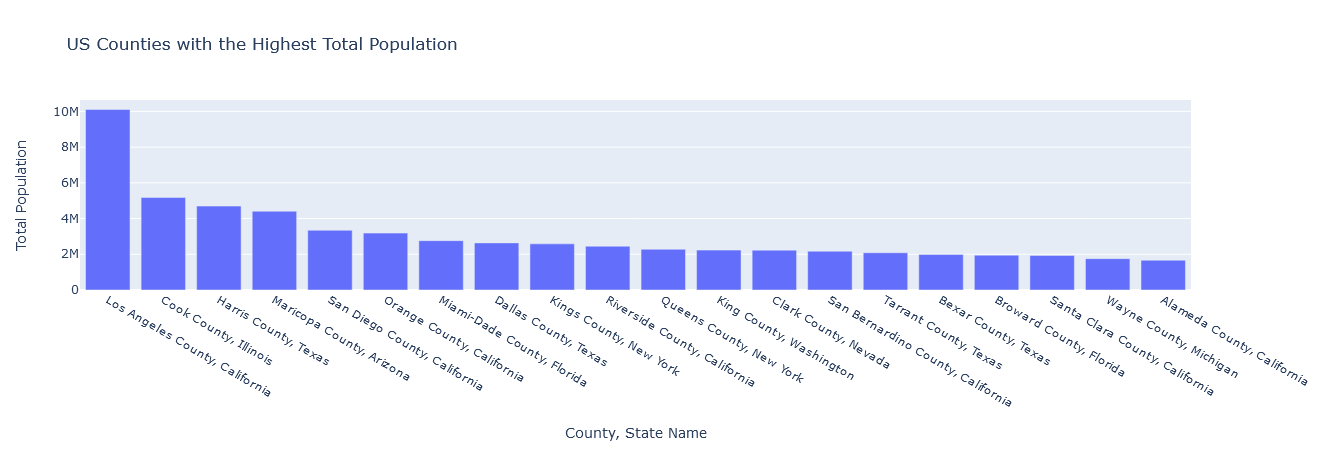

In [74]:
bar_total_pop

In [ ]:
# make a graph to show percent of largest 18 under population 
bubble_u18_o60 = px.scatter(df_county_health,
                            x = "percent_over60",
                            y = "percent_under18",
                            size = "hospital_bed_count",
                            hover_data = ['Geographic Area N',"Total"],
                            title = "Percentage of Population Under 18 and Over 60 in US Counties",
                            labels = {"Geographic Area N": "County, State Name",
                                      "Total": "Total Population",
                                      "percent_over60": "Percent of County Population over 60 years old",
                                      "percent_under18": "Percent of County Population under 18 years old"})

In [ ]:
bubble_u18_o60

In [83]:
# make a column to standardize hospital bed count
# number of hospital beds per 1,000 people
df_county_health["hospitalbeds_per10000"] = (df_county_health["hospital_bed_count"]/df_county_health["Total"])*1000

In [ ]:
# make a graph to show percent of largest 18 under population 
# with bubble size corresponding to #hospital beds per 1000 people
bubble_u18_o60_beds = px.scatter(df_county_health,
                            x = "percent_over60",
                            y = "percent_under18",
                            size = "hospitalbeds_per10000",
                            hover_data = ['Geographic Area N',"Total"],
                            title = "Percentage of Population Under 18 and Over 60 in US Counties",
                            labels = {"Geographic Area N": "County, State Name",
                                      "Total": "Total Population",
                                      "percent_over60": "Percent of County Population over 60 years old",
                                      "percent_under18": "Percent of County Population under 18 years old",
                                     "hospitalbeds_per10000": "Number of Hospital Beds per 1000 People"})

In [ ]:
bubble_u18_o60_beds

In [86]:
# preview end of covid dataframe
df_covid.tail()

,date,county,state,fips,cases,deaths
135565,2020-05-11,Sublette,Wyoming,56035.0,3,0
135566,2020-05-11,Sweetwater,Wyoming,56037.0,20,0
135567,2020-05-11,Teton,Wyoming,56039.0,98,1
135568,2020-05-11,Uinta,Wyoming,56041.0,9,0
135569,2020-05-11,Washakie,Wyoming,56043.0,7,0


In [87]:
# create a new dataframe that only includes the most recent coronavirus data
df_covid_apr10 = df_covid[df_covid["date"]== "2020-04-10"]

In [88]:
# first, remove null values from fips
df_covid_apr10 = df_covid_apr10[df_covid_apr10["fips"].notnull()]

# convert fips number to int and then string
df_covid_apr10["fips"] = df_covid_apr10["fips"].astype(int)
df_covid_apr10["fips"] = df_covid_apr10["fips"].astype(str)

In [89]:
# adding preceding zeros so that the FIPS code includes 5 digits
df_covid_apr10["fips"] = df_covid_apr10["fips"].str.zfill(5)

In [90]:
# preview data
df_covid_apr10.head()

,date,county,state,fips,cases,deaths
45760,2020-04-10,Autauga,Alabama,01001,17,1
45761,2020-04-10,Baldwin,Alabama,01003,59,1
45762,2020-04-10,Barbour,Alabama,01005,9,0
45763,2020-04-10,Bibb,Alabama,01007,11,0
45764,2020-04-10,Blount,Alabama,01009,12,0


In [91]:
# merge covid data to df_county_health data
df_county_health = pd.merge(df_county_health,
                           df_covid_apr10[["fips", "cases", "deaths"]],
                           how = "left",
                           left_on = "full_county_fips",
                           right_on = "fips")

In [92]:
df_county_health.head()

,d,Geographic Area N,Total,Male,Female,Total Under 18 year,Male Under 18 year,Female Under 18 year,Total 60 years and over,Male 60 years and over,...,full_county_fips,percent_under18,percent_over60,COUNTYFIPS,hospital_bed_count,hospital_count,hospitalbeds_per10000,fips,cases,deaths
0,0500000US01117,"Shelby County, Alabama",215707,105022,110685,48670,25382,23288,47098,21899,...,01117,22.563014,21.834247,01117,349.0,3.0,1.617935,01117,185.0,5.0
1,0500000US01121,"Talladega County, Alabama",79828,38489,41339,16810,8292,8518,20479,8991,...,01121,21.057774,25.653906,01121,285.0,2.0,3.570176,01121,32.0,0.0
2,0500000US01125,"Tuscaloosa County, Alabama",208911,99576,109335,43992,21652,22340,39432,18110,...,01125,21.057771,18.875023,01125,-2064.0,7.0,-9.879805,01125,91.0,0.0
3,0500000US04021,"Pinal County, Arizona",447138,233292,213846,101143,52140,49003,118634,56331,...,04021,22.620086,26.531854,04021,-3747.0,7.0,-8.379963,04021,138.0,3.0
4,0500000US06045,"Mendocino County, California",87606,43017,44589,18535,9033,9502,25968,12178,...,06045,21.157227,29.641805,06045,141.0,3.0,1.609479,06045,4.0,0.0


In [93]:
# make two more columns that show number of cases/deaths per 1000 people
df_county_health["cases_per1000"] = (df_county_health["cases"]/df_county_health["Total"])*1000
df_county_health["deaths_per1000"] = (df_county_health["deaths"]/df_county_health["Total"])*1000

In [94]:
# correlation table
covid_corr = df_county_health.corr()

In [95]:
# preview correlation table
covid_corr

,Total,Male,Female,Total Under 18 year,Male Under 18 year,Female Under 18 year,Total 60 years and over,Male 60 years and over,Female 60 years and over,Median age (years),...,Child dependency ratio,percent_under18,percent_over60,hospital_bed_count,hospital_count,hospitalbeds_per10000,cases,deaths,cases_per1000,deaths_per1000
Total,1.000000,0.999857,0.999866,0.993070,0.993071,0.993004,0.986421,0.986031,0.986037,-0.117325,...,-0.020493,0.044921,-0.176370,0.673950,0.914842,0.040621,0.483448,0.424326,0.144345,0.127119
Male,0.999857,1.000000,0.999445,0.993453,0.993486,0.993353,0.985345,0.985358,0.984637,-0.119001,...,-0.018792,0.046884,-0.178172,0.671339,0.914545,0.039388,0.479695,0.420643,0.141521,0.124176
Female,0.999866,0.999445,1.000000,0.992429,0.992399,0.992396,0.987192,0.986414,0.987122,-0.115671,...,-0.022132,0.043011,-0.174579,0.676291,0.914879,0.041802,0.486980,0.427804,0.147051,0.129945
Total Under 18 year,0.993070,0.993453,0.992429,1.000000,0.999969,0.999967,0.967238,0.967666,0.966206,-0.151806,...,0.045074,0.112767,-0.214464,0.656513,0.919732,0.035520,0.464070,0.405342,0.134313,0.117101
Male Under 18 year,0.993071,0.993486,0.992399,0.999969,1.000000,0.999872,0.967255,0.967718,0.966194,-0.151629,...,0.045261,0.112922,-0.214460,0.656386,0.919195,0.035361,0.463958,0.405269,0.134279,0.117025
Female Under 18 year,0.993004,0.993353,0.992396,0.999967,0.999872,1.000000,0.967157,0.967549,0.966154,-0.151979,...,0.044876,0.112597,-0.214454,0.656603,0.920232,0.035684,0.464157,0.405392,0.134341,0.117173
Total 60 years and over,0.986421,0.985345,0.987192,0.967238,0.967255,0.967157,1.000000,0.999515,0.999683,-0.027644,...,-0.067963,-0.027470,-0.078036,0.668113,0.891150,0.046182,0.511044,0.457452,0.167103,0.153453
Male 60 years and over,0.986031,0.985358,0.986414,0.967666,0.967718,0.967549,0.999515,1.000000,0.998413,-0.023275,...,-0.066652,-0.027728,-0.074046,0.662731,0.890830,0.044354,0.504283,0.451380,0.162545,0.149317
Female 60 years and over,0.986037,0.984637,0.987122,0.966206,0.966194,0.966154,0.999683,0.998413,1.000000,-0.031154,...,-0.068973,-0.027242,-0.081206,0.671988,0.890777,0.047627,0.516256,0.462133,0.170716,0.156729
Median age (years),-0.117325,-0.119001,-0.115671,-0.151806,-0.151629,-0.151979,-0.027644,-0.023275,-0.031154,1.000000,...,-0.290061,-0.527027,0.913761,-0.042083,-0.155379,0.002370,-0.009024,0.006985,0.015160,0.047080


In [96]:
# make an annotated heatmap
county_covid19_heatmap = ff.create_annotated_heatmap(z = covid_corr.values, 
                                       x=list(covid_corr.columns), 
                                       y=list(covid_corr.index), 
                                       annotation_text=covid_corr.round(2).values, 
                                       showscale = True 
                                       )

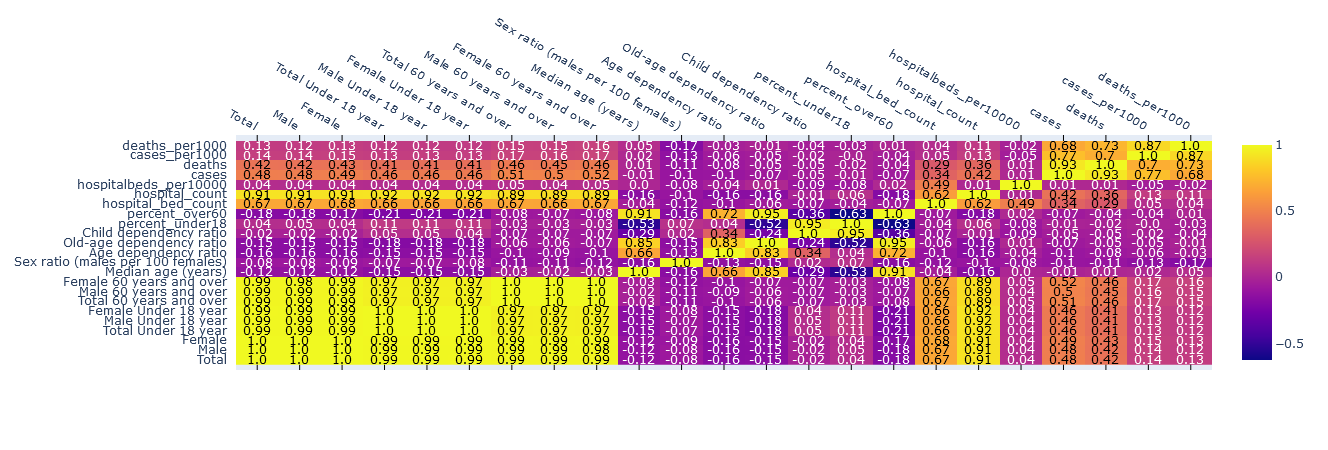

In [97]:
# show correlation heatmap
county_covid19_heatmap

In [102]:
df_total60 = df_county_health.sort_values(by = "percent_over60" , ascending = False)

In [103]:
df_total60_up = df_total60.head(20)

In [104]:
# make a graph to show percent of largest 18 under population 
bar_total_pop60_up = px.bar(df_total60_up,
                   x = "Geographic Area N",
                   y = "percent_over60",
                   title = "US Counties with the Highest Percent Over 60 Population",
                   labels = {"Geographic Area N": "County, State Name", "percent_over60": "Percent Over 60"})

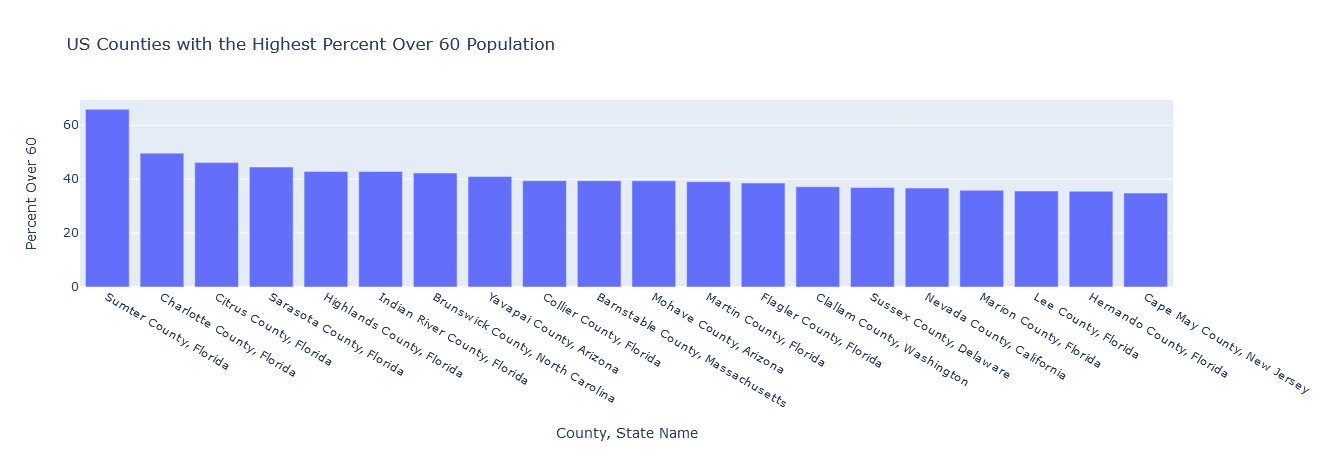

In [105]:
bar_total_pop60_up